In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6303483717787036148, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3742496907535866868
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab_Kullanimi/')
!ls

a		    hs_err_pid7274.log.gdoc  model_plot.png  YazarTanima
CinsiyetTanima	    hs_err_pid7949.log	     tree.dot	     zemberek-full.jar
hs_err_pid7274.log  hs_err_pid8352.log	     tree.png


In [ ]:
!pip install tensorflow==1.14.0
!pip install -q keras
!pip install scikit-learn

In [ ]:
from glob import glob
headers = []
label_list = []

for index, file in enumerate(glob('CinsiyetTanima/**/*.txt', recursive=True)): # labels
    label_list.append(file.split("/")[-2]),
    headers.append((open(file, encoding="ISO-8859-9", errors='ignore').read().replace('\n', ' ').strip().lower()))      

print("haber  :  ", len(headers))
print("label  :  ", len(label_list))

haber  :   43292
label  :   43292


In [ ]:
print("toplam veri sayısı : ",len(label_list))


value1 = [i for i in label_list if i in '0']
value2 = [i for i in label_list if i in '1']

print("0.sınıf : ",len(value1))
print("1.sınıf : ",len(value2))

toplam veri sayısı :  43292
0.sınıf :  21646
1.sınıf :  21646


In [ ]:
print(headers[1])

türkiyede 20 bin kişi ata biniyor kayıtlı sporcu 500ü geçmiyor   17 mart 2012    - equist at ve binicilik fuarı 13-15 nisan 2012de i̇stanbul fuar merkezinde açılıyor. marmara üniversitesi i̇letişim fakültesini bitirdikten sonra kısa süre gazetecilik yapan i̇lker altun, uzun süre geçenlerde vefat eden uluslararası nakliyeciler derneği (und) ile roderin kurucusu saffet ulusoya danışmanlık görevini yürüttü. ardından lojistik sektörüne dönük yayıncılık şirketi kurup, yola koyuldu. lojistik sektöründeki bağlantıları onu sınıf arkadaşı merih güngörle birlikte eko fuarcılıkı kurmaya yönlendirdi. eko fuarcılık, ilk iş olarak lojistik sektörüne dönük fuar düzenleme yoluna gitti. i̇lker altun, bir yandan eşi selma altunla birlikte işlerini büyütürken diğer taraftan şekerpınarda çiftlik evi yapmak  üzere aldığı arsayı iddialı bir at çiftliğine dönüştürdü. gelen mesaj üzerine i̇lker altunu aradım: - at ve binicilik fuarı da nereden çıktı? daha önce böyle bir fuar düzenlenmiş miydi türk

In [ ]:
import nltk #doğal dil işleme kütüphanesini projeye ekledim.

for i in range(len(headers)):
   
    headers[i] = headers[i].lower() #tüm kelimeleri küçük harfe çevirdim.
    headers[i] = headers[i].split() #tüm kelimelerin ayrılması
    
#print(headers[0])

In [ ]:
#stopwords (gereksiz kelimelerin) atılması
import nltk
nltk.download("stopwords")  #stopwords kelimelerin indirilmesi
from nltk.corpus import stopwords

def removeStopWords(headers):
    
    filtered_stopwords = []
    filtered_stopwords_number = []
    
    stop_words = stopwords.words('turkish')
    
    stop_words.append("bir")
    stop_words.append("iki")
    stop_words.append("üç")
    stop_words.append("dört")
    stop_words.append("beş")
    stop_words.append("altı")
    stop_words.append("yedi")
    stop_words.append("sekiz")
    stop_words.append("dokuz")
    stop_words.append("on")
    stop_words.append("ancak")
    stop_words.append("artık")
    stop_words.append("asla")
    stop_words.append("bana")
    stop_words.append("bazen")
    stop_words.append("bazıları")
    stop_words.append("bazısı")
    stop_words.append("ben")
    stop_words.append("beni")
    stop_words.append("benim")
    stop_words.append("bile")
    stop_words.append("böyle")
    stop_words.append("böylece")
    stop_words.append("bütün")
    stop_words.append("burada")
    stop_words.append("bunun")
    stop_words.append("bunu")
    stop_words.append("çoğu")
    stop_words.append("çoğuna")
    stop_words.append("çoğunu")
    stop_words.append("değil")
    stop_words.append("demek")
    stop_words.append("diğer")
    stop_words.append("dolayı")
    stop_words.append("elbette")
    stop_words.append("madem")
    stop_words.append("nesi")
    stop_words.append("zaten")
    stop_words.append("zira")
    stop_words.append("yoksa")
    stop_words.append("yine")
    stop_words.append("yerine")
    stop_words.append("veyahut")
    stop_words.append("var")
    stop_words.append("üzere")
    stop_words.append("tamam")
    stop_words.append("tümü")
    stop_words.append("tabi")
    stop_words.append("rağmen")
    stop_words.append("oysa")
    stop_words.append("oysaki")
    stop_words.append("orada")
    stop_words.append("öbürü")
    stop_words.append("önce")
    stop_words.append("içinde")
    stop_words.append("işte")
    stop_words.append("gene")
    stop_words.append("falan")
    stop_words.append("felan")
    stop_words.append("filan")
    stop_words.append("fakat")
    stop_words.append("hala")
    stop_words.append("hangi")
    stop_words.append("hangisi")
    stop_words.append("hani")
    stop_words.append("hatta")
    stop_words.append("henüz")
    stop_words.append("hepsine")
    stop_words.append("hepsini")
    stop_words.append("herkes")
    stop_words.append("hiçbiri")
    
    
    
    
    print("stop_words : ",stop_words)



    for i in headers:
        filtered_sentence = [w for w in i if not w in stop_words]
                            
        filtered_stopwords.append(" ".join(filtered_sentence))                  
    
    return filtered_stopwords,filtered_stopwords_number                                       


headers,filtered_stopwords_number = removeStopWords(headers)
#print(headers[0])
                            

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop_words :  ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz', 'on', 'ancak', 'artık', 'asla', 'bana', 'bazen', 'bazıları', 'bazısı', 'ben', 'beni', 'benim', 'bile', 'böyle', 'böylece', 'bütün', 'burada', 'bunun', 'bunu', 'çoğu', 'çoğuna', 'çoğunu', 'değil', 'demek', 'diğer', 'dolayı', 'elbette', 'madem', 'nesi', 'zaten', 'zira', 'yoksa', 'yine', 'yerine', 'veyahut', 'var', 'üzere', 'tamam', 'tümü', 'tabi', 'rağmen', 'oysa', 'oysaki', 'orada', 'öbürü', 'önce', 'i

In [ ]:
import numpy as np
import re
for i in range(len(headers)):
    headers[i] = re.sub(r'[0-9]'," ",headers[i])
    headers[i] = re.sub(r'[.,x?!<=>&*%+^“/”):;‘’"’(]'," ", headers[i])
    
#print(headers[0])
print(headers[1])

türkiyede    bin kişi ata biniyor kayıtlı sporcu    ü geçmiyor    mart      - equist at binicilik fuarı   -   nisan     de i̇stanbul fuar merkezinde açılıyor  marmara üniversitesi i̇letişim fakültesini bitirdikten sonra kısa süre gazetecilik yapan i̇lker altun  uzun süre geçenlerde vefat eden uluslararası nakliyeciler derneği  und  roderin kurucusu saffet ulusoya danışmanlık görevini yürüttü  ardından lojistik sektörüne dönük yayıncılık şirketi kurup  yola koyuldu  lojistik sektöründeki bağlantıları onu sınıf arkadaşı merih güngörle birlikte eko fuarcılıkı kurmaya yönlendirdi  eko fuarcılık  ilk iş olarak lojistik sektörüne dönük fuar düzenleme yoluna gitti  i̇lker altun  yandan eşi selma altunla birlikte işlerini büyütürken taraftan şekerpınarda çiftlik evi yapmak aldığı arsayı iddialı at çiftliğine dönüştürdü  gelen mesaj üzerine i̇lker altunu aradım  - at binicilik fuarı nereden çıktı  fuar düzenlenmiş miydi türkiyede  soruma telefonda yanıt vermek yüz yüze anlatmayı se

In [ ]:
!pip install JPype1

     |████████████████████████████████| 3.6MB 2.8MB/s 


In [ ]:
from os.path import join
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java


ZEMBEREK_PATH = 'zemberek-full.jar'
startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [ ]:
TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
Paths = JClass('java.nio.file.Paths')
morphology = TurkishMorphology.createWithDefaults()

In [ ]:
from typing import List
TurkishMorphology: JClass = JClass('zemberek.morphology.TurkishMorphology')

morphology: TurkishMorphology = TurkishMorphology.createWithDefaults()

    
for i in range(len(headers)):
    
    sentence: str = headers[i]
    
    analysis: java.util.ArrayList = (
        morphology.analyzeAndDisambiguate(sentence).bestAnalysis()
        )

    pos: List[str] = []

    for j, analysis in enumerate(analysis, start=1):
        #print(
        f'\nAnalysis {j}: {analysis}',
        f'\nPrimary POS {j}: {analysis.getPos()}'
        f'\nPrimary POS (Short Form) {j}: {analysis.getPos().shortForm}'
            #)
        pos.append(
        f'{str(analysis.getLemmas()[0])}'
            #f'-{analysis.getPos().shortForm}'
                )
    f'\nFull sentence with POS tags: {" ".join(pos)}'
    headers[i] = pos

In [ ]:
print(headers[1])

['türkiye', 'bin', 'kişi', 'ata', 'bin', 'kayıt', 'spor', 'UNK', 'UNK', 'geç', 'mart', '-', 'UNK', 'at', 'bin', 'fuar', '-', 'nisan', 'UNK', 'de', 'UNK', 'fuar', 'merkez', 'aç', 'marmara', 'üniversitesi', 'UNK', 'fakülte', 'bitir', 'sonra', 'kısa', 'süre', 'gazete', 'yap', 'UNK', 'altun', 'uzun', 'süre', 'geçenlerde', 'vefat', 'et', 'uluslararası', 'nakliye', 'dernek', 'und', 'roder', 'kur', 'saffet', 'ulusoy', 'danışman', 'görev', 'yürü', 'ardından', 'lojistik', 'sektör', 'dönük', 'yayın', 'şirket', 'kur', 'yol', 'koy', 'lojistik', 'sektör', 'bağlantı', 'o', 'sınıf', 'arkadaş', 'merih', 'güngör', 'birlikte', 'eko', 'fuarcılık', 'kurmay', 'yönlen', 'eko', 'fuarcılık', 'ilk', 'iş', 'ol', 'lojistik', 'sektör', 'dönük', 'fuar', 'düzenle', 'yol', 'git', 'UNK', 'altun', 'yan', 'eş', 'selma', 'altun', 'birlikte', 'iş', 'büyüt', 'taraf', 'şekerpınar', 'çiftlik', 'ev', 'yap', 'al', 'arsa', 'iddia', 'at', 'çiftlik', 'dönüş', 'gel', 'mesaj', 'üzeri', 'UNK', 'altun', 'ara', '-', 'at', 'bin', 'fua

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence


max_len = 1000
tok = Tokenizer(num_words=max_len)
tok.fit_on_texts(headers)
sequences = tok.texts_to_sequences(headers)
headers = sequence.pad_sequences(sequences,maxlen=max_len)

print(headers.shape)

Using TensorFlow backend.


(43292, 1000)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_list = le.fit_transform(label_list)
label_list = label_list.reshape(-1,1)

print(label_list.shape)

(43292, 1)


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Embedding
from keras.layers import Conv2D,Conv1D, MaxPool2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import layers


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

seed = 7
np.random.seed(seed)

precision_value_train = []
precision_value_test = []
recall_value_train = []
recall_value_test = []
conf_matrix_list_of_arrays = []

In [ ]:
maxlen = 1000
vocab_size= 100000

In [ ]:
skf = StratifiedKFold(n_splits=10)

accSum = 0
val_accSum = 0
sayac=0
for train, test in skf.split(headers, label_list):

    sayac = sayac+1
    embedding_dim=300


    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])
    history = model.fit(headers[train],label_list[train], validation_data = (headers[test], label_list[test]), batch_size=128,epochs=2)

    pred = model.predict(headers[test])

    
    precision = precision_score(label_list[test],pred.round() , average='macro')
    precision_value.append(precision)
    recall = recall_score(label_list[test], pred.round(), average='macro')
    recall_value.append(recall)


    conf_matrix = confusion_matrix(label_list[test], pred.round())
    conf_matrix_list_of_arrays .append(conf_matrix)
    
    history.history.keys()
    print("\n")
    epochDizisi = history.history['accuracy']
    valDizisi = history.history['val_accuracy']
    accSum += epochDizisi[len(epochDizisi)-1]
    val_accSum += valDizisi[len(valDizisi)-1]
    print("\n")
    
  
    
print("\n Total Sayac: ", sayac)
accMean=accSum/sayac
val_accMean= val_accSum/sayac
print("\n Total Train Accuracy:", accMean)
print("\n Total Test Val_accuracy:", val_accMean)


print("Precision : ",np.mean(precision_value))
print("\n")
print("Recall : ",np.mean(recall_value))
print("\n")
confision_matrix = np.mean(conf_matrix_list_of_arrays, axis=0)

    



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 38962 samples, validate on 4330 samples
Epoch 1/2
38962/38962 [==============================] - 431s 11ms/step - loss: 0.3390 - accuracy: 0.8481 - val_loss: 0.2561 - val_accuracy: 0.8933
Epoch 2/2
38962/38962 [==============================] - 425s 11ms/step - loss: 0.2153 - accuracy: 0.9150 - val_loss: 0.2382 - val_accuracy: 0.9030




Train on 38962 samples, validate on 4330 samples
Epoch 1/2
38962/38962 [==============================] - 421s 11ms/step - loss: 0.3590 - accuracy: 0.8375 - val_loss: 0.1979 - val_accuracy: 0.9263
Epoch 2/2
38962/38962 [==============================] - 419s 11ms/step - loss: 0.2326 - accuracy: 0.9073 - val_loss: 0.1754 - val_accuracy: 0.9224




Train on 38963 samples, validate on 4329 samples
Epoch 1/2
38963/38963 [==============================] - 415s 11ms/step - loss: 0.3624 - accuracy: 0.8356 - val_loss: 0.2207 - val_accuracy: 0.9161
Epoch 2/2

In [ ]:
#modelin tablosunun çizdirilmesi
model.summary() 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1000, 300)         30000000  
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 998, 64)           57664     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 499, 64)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 31936)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               4087936   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)               

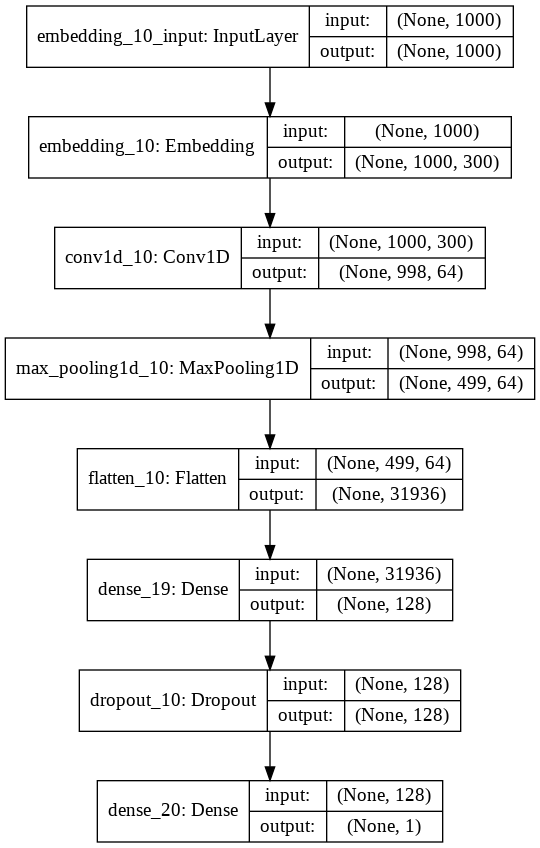

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

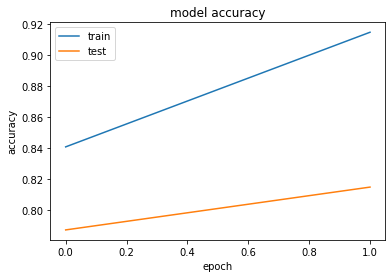

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
history_dict = history.history

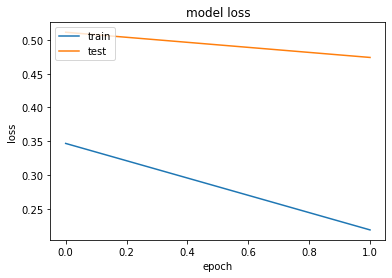

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(33.0, 0.5, 'predicted label')

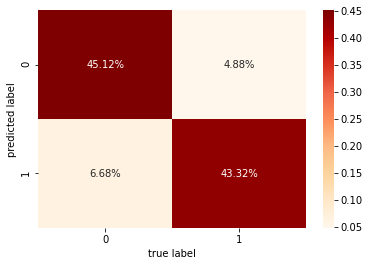

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confision_matrix/np.sum(confision_matrix),
            annot=True, fmt='.2%', cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')